In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
number_of_sheets = 10
sheets = []
neutron_data = []
dates = []
for i in range(number_of_sheets):
    sheets.append(pd.read_excel('../Data/Neutron probe/2021_final neutron probe and water balance.xlsx', sheet_name=i, engine='openpyxl', header = None))
    dates.append(sheets[i].iloc[[2],[1]].values[0][0])
    neutron_data.append(pd.DataFrame(sheets[i].iloc[list(range(14,50)),list(range(9))]))
    neutron_data[i].columns = ['Rep','Water','Nrate',6,5,4,3,2,1]
    neutron_data[i][6] = neutron_data[i][6].astype('float64')
    neutron_data[i][4] = neutron_data[i][4].astype('float64')
    neutron_data[i][3] = neutron_data[i][3].astype('float64')
    standard_count = sheets[i].iloc[[4],[8]].values[0][0]
    
    if i == 0:
        cal_slope = sheets[0].iloc[[1],[8]].values[0][0]
        cal_intercept = sheets[0].iloc[[2],[8]].values[0][0]
    neutron_data[i][[6,5,4,3,2,1]] = (neutron_data[i][[6,5,4,3,2,1]] / standard_count * cal_slope + cal_intercept) * 1.321 * 100

print(dates[0])
print(cal_slope)
print(cal_intercept)
print(standard_count)

2021-06-14 00:00:00
0.147871
-0.0635
6397.0


In [3]:
neutron_data[0].dtypes

Rep       object
Water     object
Nrate     object
6        float64
5        float64
4        float64
3        float64
2        float64
1        float64
dtype: object

In [4]:
neutron_data[i][[6,5,4,3,2,1]]


,6,5,4,3,2,1
14,23.335305,22.458928,21.799354,16.809802,27.179764,22.495571
15,20.559600,21.252763,21.912337,20.504636,26.795013,19.133578
16,26.443851,20.303099,22.898643,22.138302,27.784373,20.016063
17,24.743006,20.406921,16.101371,14.363884,22.568856,18.025128
18,22.752071,20.733654,19.106095,21.316888,22.043640,16.571623
19,24.211683,22.074176,20.022170,18.895398,22.629928,19.933616
20,15.136440,16.189925,15.719674,16.409783,25.048364,16.015871
21,23.332252,23.634556,22.394802,17.133482,21.448192,18.214450
22,22.865054,20.974887,19.020595,19.084720,23.600967,20.623725
23,24.718578,22.727643,21.536746,21.503157,23.326145,21.277192


In [5]:
neutron_data[0].groupby(['Water']).mean()

,6,5,4,3,2,1
Water,,,,,,
1,26.865809,25.734305,25.822886,26.472116,30.899345,21.174751
2,26.870730,26.022102,25.427917,26.227333,30.855237,21.057919


In [6]:
neutron_data[0].head()

,Rep,Water,Nrate,6,5,4,3,2,1
14,1,1,1,26.378067,26.798006,25.525064,20.557965,30.843207,20.981185
15,2,1,1,23.422085,25.114967,27.345897,26.351820,30.502006,23.123534
16,3,1,1,29.665407,24.032310,27.723186,29.091271,30.101751,23.258046
17,1,1,2,27.155611,24.232437,25.249479,22.073684,31.168004,23.133376
18,2,1,2,26.558510,25.479133,25.088721,30.380617,28.969882,22.382078


In [7]:
neutron_data[0].shape

(36, 9)

In [8]:
df_melted = pd.melt(neutron_data[7], id_vars=['Rep','Water','Nrate'], value_vars=[6,5,4,3,2,1])
df_melted

,Rep,Water,Nrate,variable,value
0,1,1,1,6,25.142568
1,2,1,1,6,22.099575
2,3,1,1,6,28.921130
3,1,1,2,6,24.257445
4,2,1,2,6,24.233028
...,...,...,...,...,...
211,2,2,5,1,13.483356
212,3,2,5,1,19.636490
213,1,2,6,1,17.490829
214,2,2,6,1,17.396212


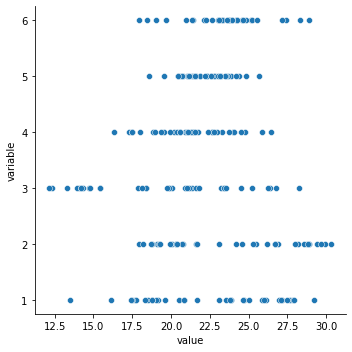

In [9]:
sns.relplot(x = 'value', y = 'variable', data = df_melted)

In [10]:
df_melted.head()

,Rep,Water,Nrate,variable,value
0,1,1,1,6,25.142568
1,2,1,1,6,22.099575
2,3,1,1,6,28.921130
3,1,1,2,6,24.257445
4,2,1,2,6,24.233028


In [11]:
df_melted_grouped = df_melted.groupby(['Water','Nrate','variable']).mean().reset_index()
# df = df.reset_index()
df_melted_grouped.head()

,Water,Nrate,variable,value
0,1,1,1,27.943425
1,1,1,2,29.004555
2,1,1,3,23.167827
3,1,1,4,24.822093
4,1,1,5,23.312296


<AxesSubplot:xlabel='Water', ylabel='value'>

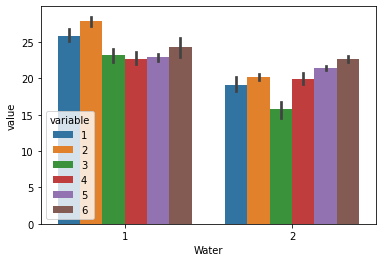

In [12]:
sns.barplot(x = 'Water', y = 'value', hue = 'variable', data = df_melted_grouped)

In [13]:
df_melted_grouped[['Water', 'Nrate','variable']]

,Water,Nrate,variable
0,1,1,1
1,1,1,2
2,1,1,3
3,1,1,4
4,1,1,5
...,...,...,...
67,2,6,2
68,2,6,3
69,2,6,4
70,2,6,5


In [14]:
(dates[0] - dates[1])

datetime.timedelta(-8)

In [15]:
days = dates[i] - dates[0]

In [16]:
# adding all dates
all_dates = df_melted_grouped[['Water', 'Nrate','variable']]
days_list = []
for i in range(number_of_sheets):
    df_melted = pd.melt(neutron_data[i], id_vars=['Rep','Water','Nrate'], value_vars=[6,5,4,3,2,1])
    df_melted_grouped = df_melted.groupby(['Water','Nrate','variable']).mean().reset_index()
    days = dates[i] - dates[0]
    days_list.append(days.days)
    all_dates[days.days] = df_melted_grouped['value']
all_dates = all_dates.rename(columns = {'variable' : 'Depth'})

In [17]:
all_dates

,Water,Nrate,Depth,0,8,14,22,28,37,50,57,64,108
0,1,1,1,22.454255,24.452259,20.558952,19.297710,23.630067,27.789236,26.159364,27.943425,28.117132,20.548404
1,1,1,2,30.482321,31.110092,30.781061,29.997604,29.566152,31.273630,28.305965,29.004555,28.387086,27.253050
2,1,1,3,25.333685,25.546652,24.256660,24.323418,24.462085,24.314861,22.496976,23.167827,22.126577,19.817580
3,1,1,4,26.864716,26.671904,25.759847,25.508986,25.750725,26.191758,24.290403,24.822093,24.142639,22.203445
4,1,1,5,25.315094,25.731806,24.448393,24.232984,24.364394,25.141987,22.895062,23.312296,22.984970,21.338263
...,...,...,...,...,...,...,...,...,...,...,...,...,...
67,2,6,2,30.798370,31.883772,31.423092,31.368452,30.241206,26.652633,20.380997,20.250990,18.163205,16.907517
68,2,6,3,27.383079,27.210835,26.111540,26.027328,25.012007,23.579019,17.994525,16.120413,12.562921,10.568282
69,2,6,4,24.954209,25.029763,24.265425,23.850293,23.339190,22.633891,19.943103,19.146111,17.160230,11.695054
70,2,6,5,25.994216,25.870672,25.608652,25.333632,25.070183,24.780189,22.628650,21.782151,21.496684,18.282646


In [18]:
all_dates_melted = pd.melt(all_dates, id_vars = ['Water','Nrate','Depth'], value_vars=days_list)
all_dates_melted = all_dates_melted.rename(columns = {'variable':'Days'})
all_dates_melted = all_dates_melted.replace({'Water': {1: 100, 2: 70}})
all_dates_melted = all_dates_melted.rename(columns={'value':'Percent water'})
all_dates_melted

,Water,Nrate,Depth,Days,Percent water
0,100,1,1,0,22.454255
1,100,1,2,0,30.482321
2,100,1,3,0,25.333685
3,100,1,4,0,26.864716
4,100,1,5,0,25.315094
...,...,...,...,...,...
715,70,6,2,108,16.907517
716,70,6,3,108,10.568282
717,70,6,4,108,11.695054
718,70,6,5,108,18.282646


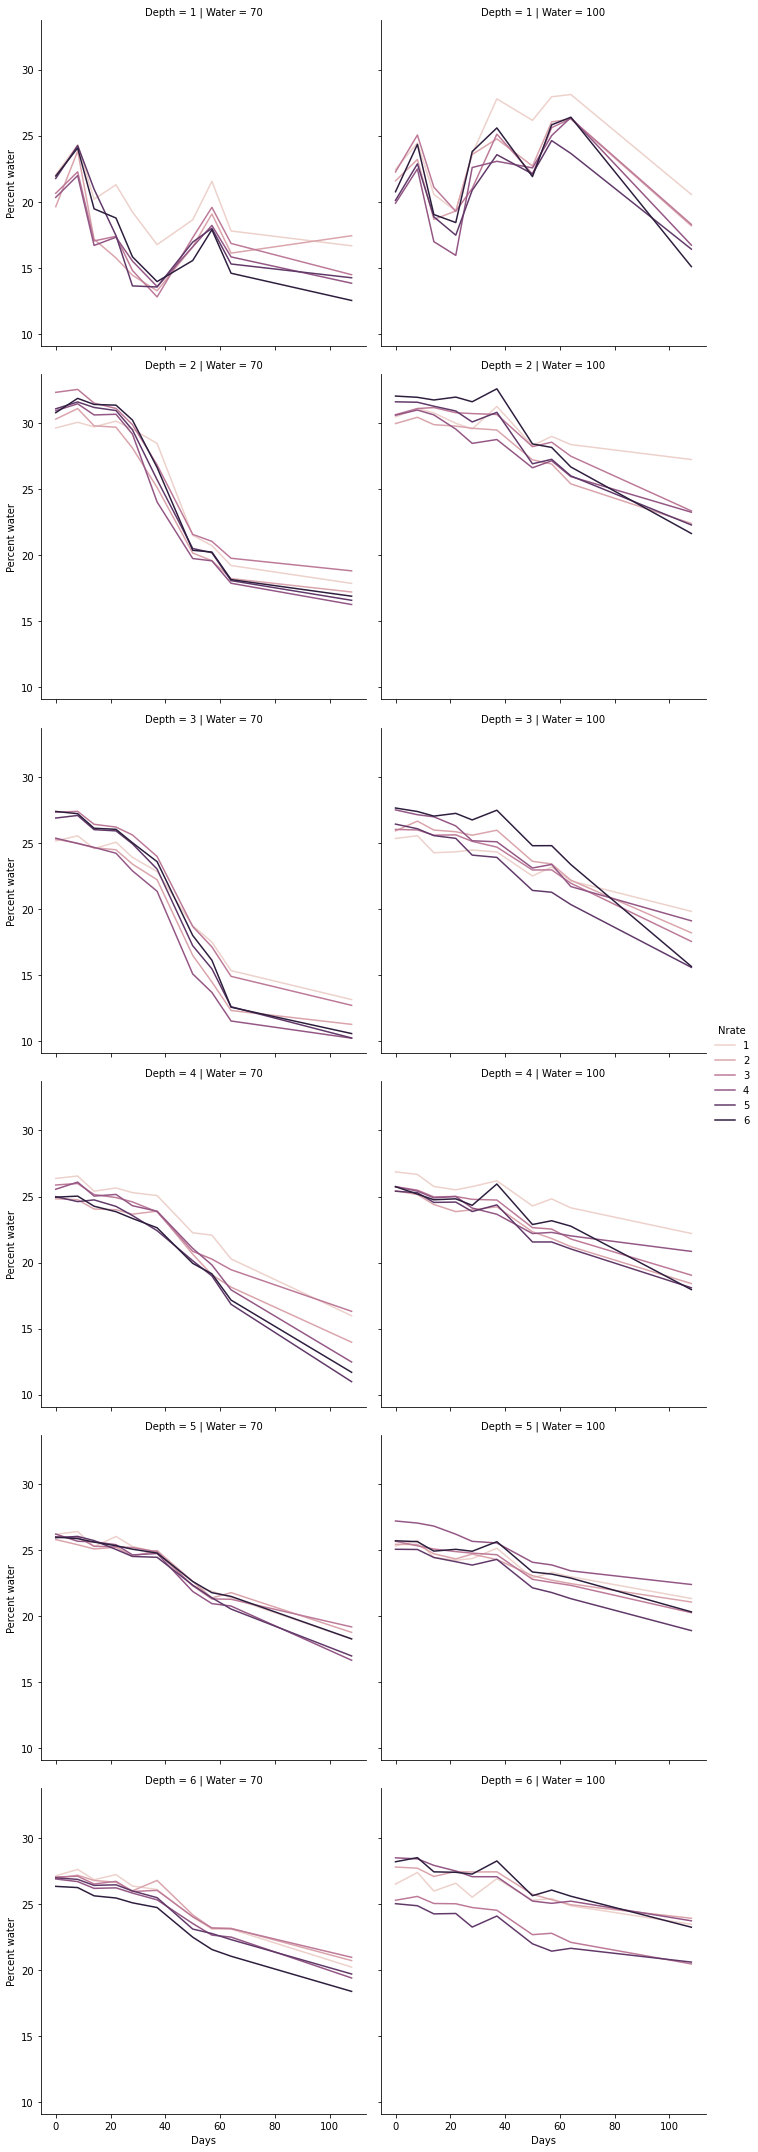

In [19]:
sns.relplot(x = 'Days', y = 'Percent water', hue = 'Nrate', kind = 'line', col = 'Water', row = 'Depth', data = all_dates_melted)
plt.savefig('../Figures/Neutron probe/depth_treatments_through_time.jpg', dpi = 300, bbox_inches='tight', format = 'jpg')

In [20]:
all_dates_dif = all_dates.copy()
for i in all_dates.columns[3:]:
    all_dates_dif[i] = all_dates_dif[i] - all_dates[0]
all_dates_dif_melted = pd.melt(all_dates_dif, id_vars = ['Water','Nrate','Depth'], value_vars=days_list)
all_dates_dif_melted = all_dates_dif_melted.rename(columns = {'variable':'Days'})
all_dates_dif_melted = all_dates_dif_melted.replace({'Water': {1: 100, 2: 70}})
all_dates_dif_melted = all_dates_dif_melted.rename(columns={'value':'Difference in percent from day 0'})

In [21]:
all_dates_dif_melted.head()

,Water,Nrate,Depth,Days,Difference in percent from day 0
0,100,1,1,0,0.0
1,100,1,2,0,0.0
2,100,1,3,0,0.0
3,100,1,4,0,0.0
4,100,1,5,0,0.0


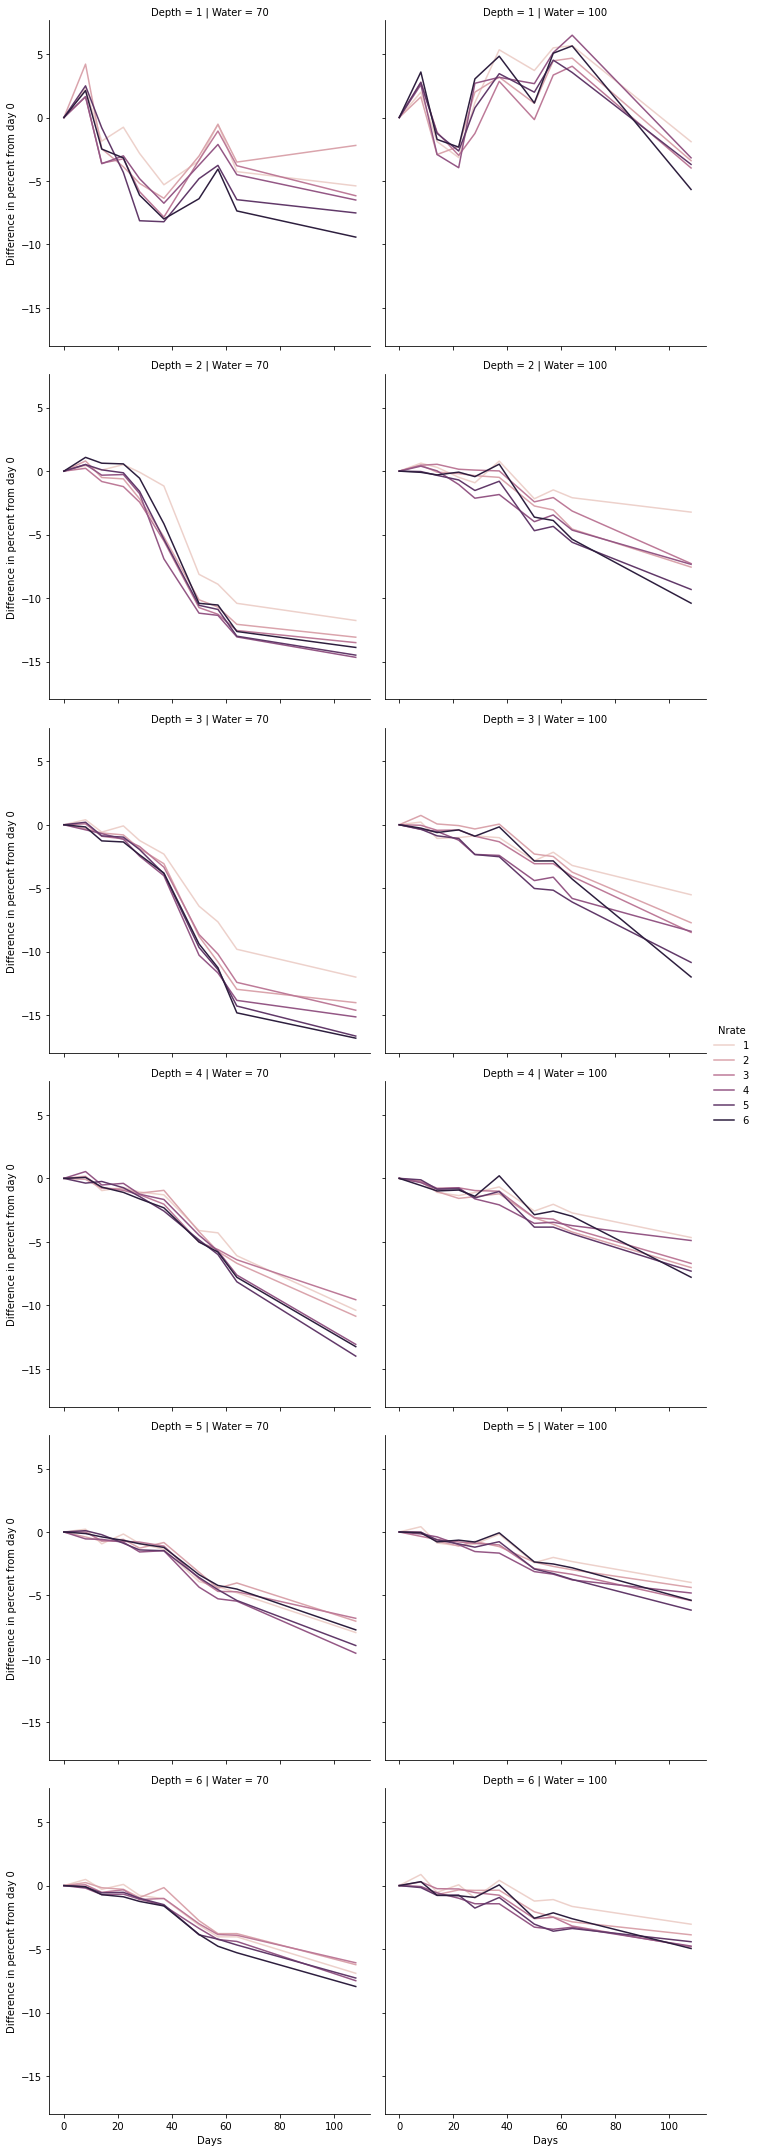

In [22]:
sns.relplot(x = 'Days', y = 'Difference in percent from day 0', hue = 'Nrate', kind = 'line', col = 'Water', row = 'Depth', data = all_dates_dif_melted)
plt.savefig('../Figures/Neutron probe/depth_treatments_difference_through_time.jpg', dpi = 300, bbox_inches='tight', format = 'jpg')

In [23]:
water_use = all_dates_dif_melted.copy()
water_use['Depth'] = water_use['Depth'].astype('str')
water_use['Difference in percent from day 0'] = water_use['Difference in percent from day 0']*30/100
water_use = water_use.rename(columns={'Difference in percent from day 0':'Water use'})
water_use_grouped = water_use.groupby(['Water','Nrate','Days']).sum()
water_use_grouped = water_use_grouped.reset_index()

In [24]:
water_use_grouped

,Water,Nrate,Days,Water use
0,70,1,0,0.000000
1,70,1,8,1.190376
2,70,1,14,-1.363898
3,70,1,22,-0.337351
4,70,1,28,-2.073278
...,...,...,...,...
115,100,6,37,1.622143
116,100,6,50,-3.939008
117,100,6,57,-2.674592
118,100,6,64,-3.727981


In [25]:
set(water_use_grouped['Days'])

{0, 8, 14, 22, 28, 37, 50, 57, 64, 108}

<AxesSubplot:xlabel='Water', ylabel='Water use'>

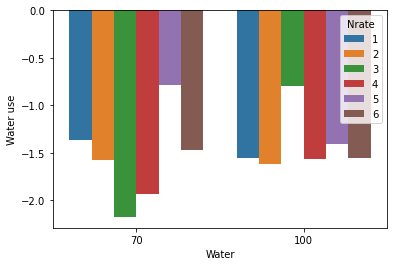

In [26]:
sns.barplot(x = 'Water', y = 'Water use', hue ='Nrate', data = water_use_grouped[water_use_grouped['Days'] == 14])

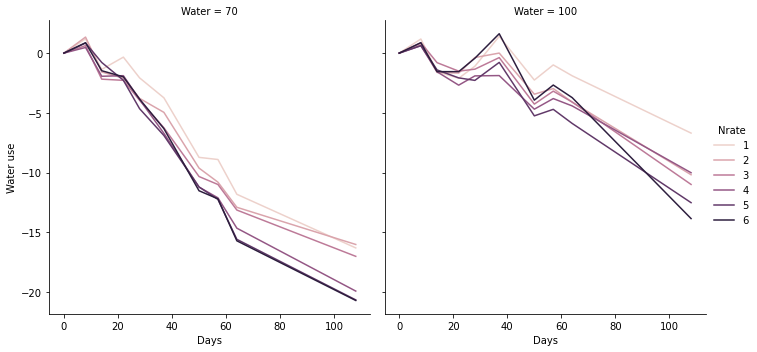

In [27]:
sns.relplot(y = 'Water use', x = 'Days', col = 'Water', hue = 'Nrate', kind = 'line', data = water_use_grouped)
plt.savefig('../Figures/Neutron probe/water_use_through_time.jpg', dpi = 300, bbox_inches='tight', format = 'jpg')

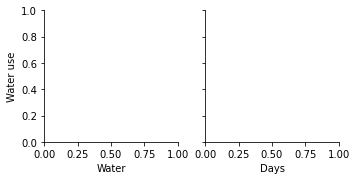

In [28]:
sns.PairGrid(y_vars = 'Water use', hue = 'Nrate', x_vars = ['Water','Days'], data = water_use_grouped)

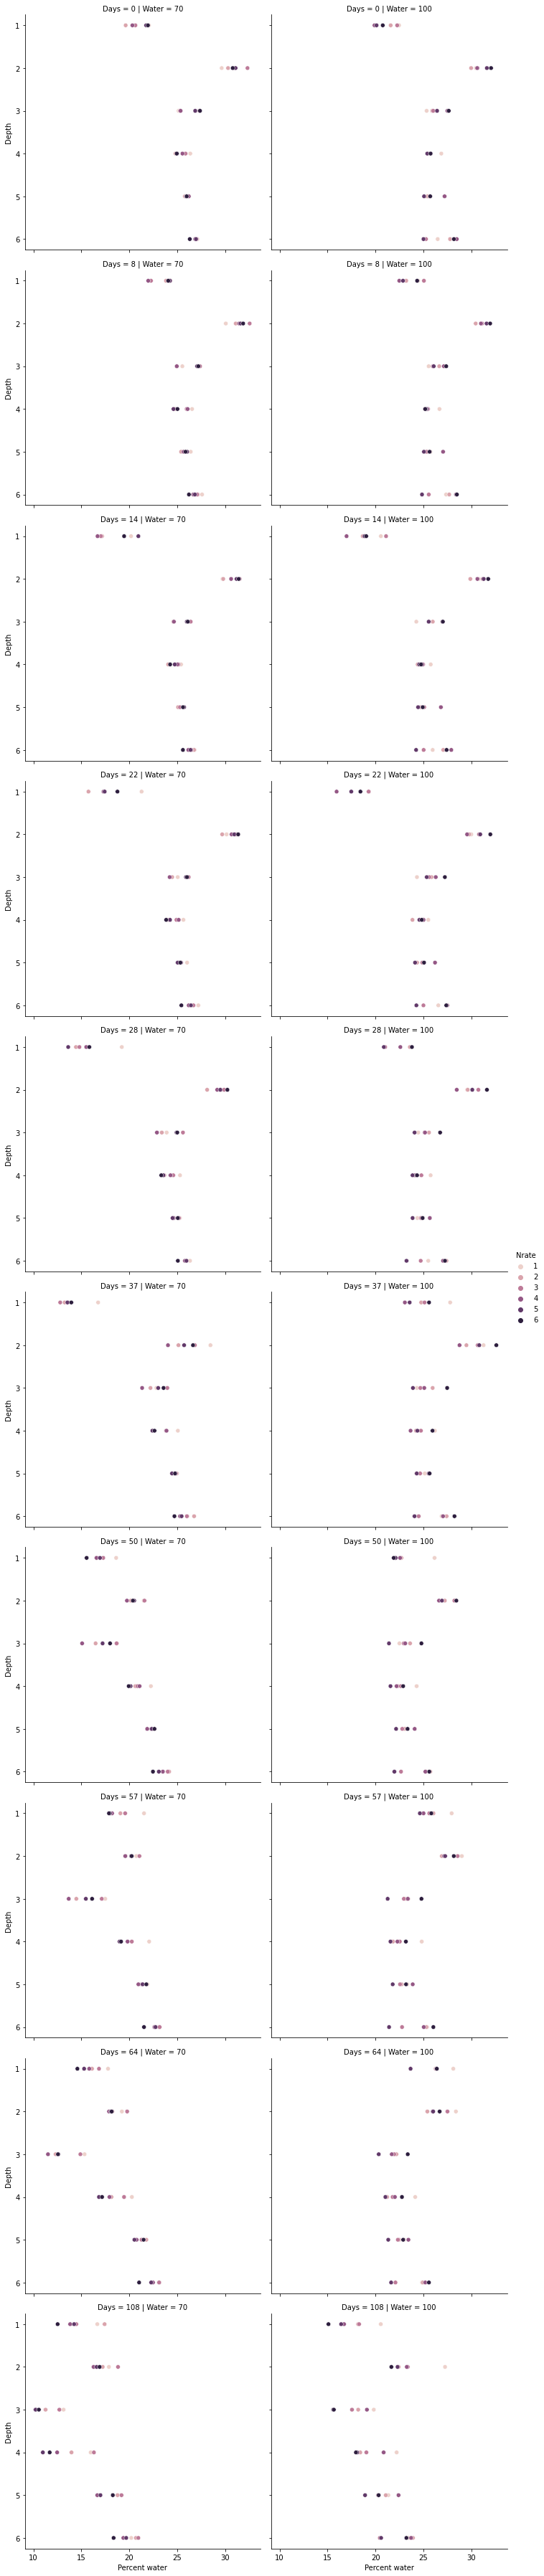

In [29]:
sns.relplot(y = 'Depth', x = 'Percent water', hue = 'Nrate', row = 'Days', col = 'Water', data = all_dates_melted)
plt.gca().invert_yaxis()